## 과제.
타이타닉 생존자 예측모델 개발을 위한 전처리 및 통계적 시각적 탐색을 통하여 최적의 분석용 데이터셋을 작성하세요.

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# df = pd.read_csv('../판다스/dataset/dataset_base/titanic3.csv')
df = pd.read_csv('../dataset/dataset_base/titanic3.csv')

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
df['age'] = df['age'].fillna(df['age'].mean())
df = df.fillna('N')
df['age'] = df['age'].round(2)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,N,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,N,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,N,N,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,N,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,N,N,"Montreal, PQ / Chesterville, ON"


In [3]:
df.corr()

,pclass,survived,age,sibsp,parch
pclass,1.000000,-0.312469,-0.366378,0.060832,0.018322
survived,-0.312469,1.000000,-0.050195,-0.027825,0.082660
age,-0.366378,-0.050195,1.000000,-0.190747,-0.130869
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587
parch,0.018322,0.082660,-0.130869,0.373587,1.000000


In [4]:
# df.drop(['embarked'], axis = 1, inplace = True)
df.drop(['home.dest'], axis = 1, inplace = True)
df.drop(['ticket'], axis = 1, inplace = True)
df.drop(['boat'], axis = 1, inplace = True)
df.drop(['cabin'], axis = 1, inplace = True)
df.drop(['body'], axis = 1, inplace = True)


In [5]:
def extract_word(name):
    match = re.search(r',\s(.+?)\.', name)
    if match:
        return match.group(1)
    else:
        return None

In [6]:
df.insert(2, 'word', df['name'].apply(extract_word))

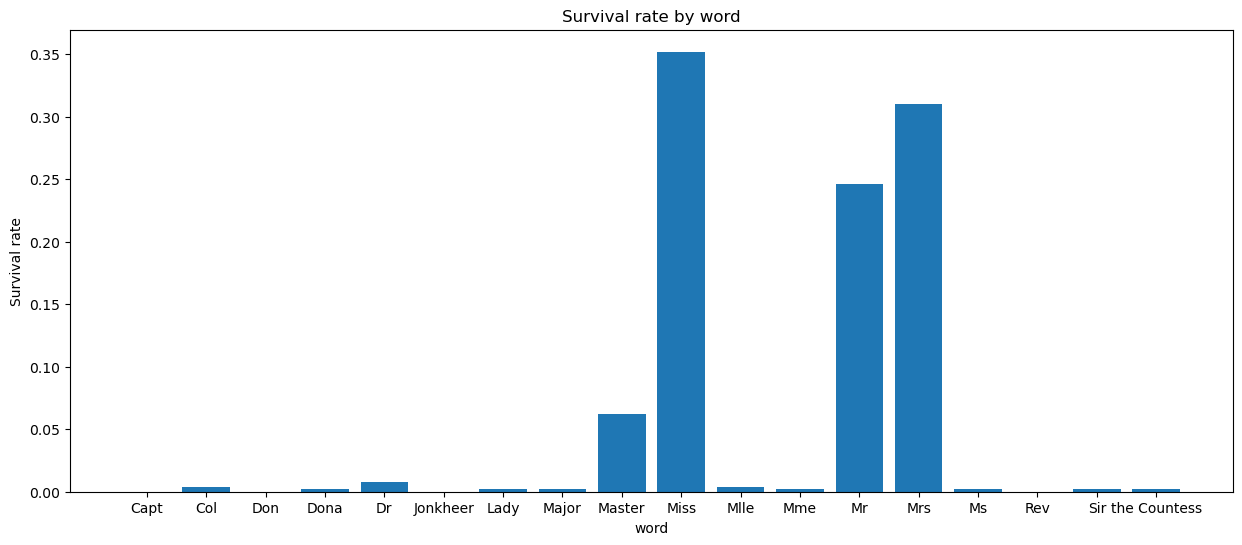

In [7]:
plt.figure(figsize = (15, 6))

word_survived = df.groupby('word')['survived'].sum()
total_survived = df['survived'].sum()
word_survival_rate = word_survived / total_survived

plt.bar(word_survival_rate.index, word_survival_rate.values)

plt.xlabel('word')
plt.ylabel('Survival rate')
plt.title('Survival rate by word')

plt.show()

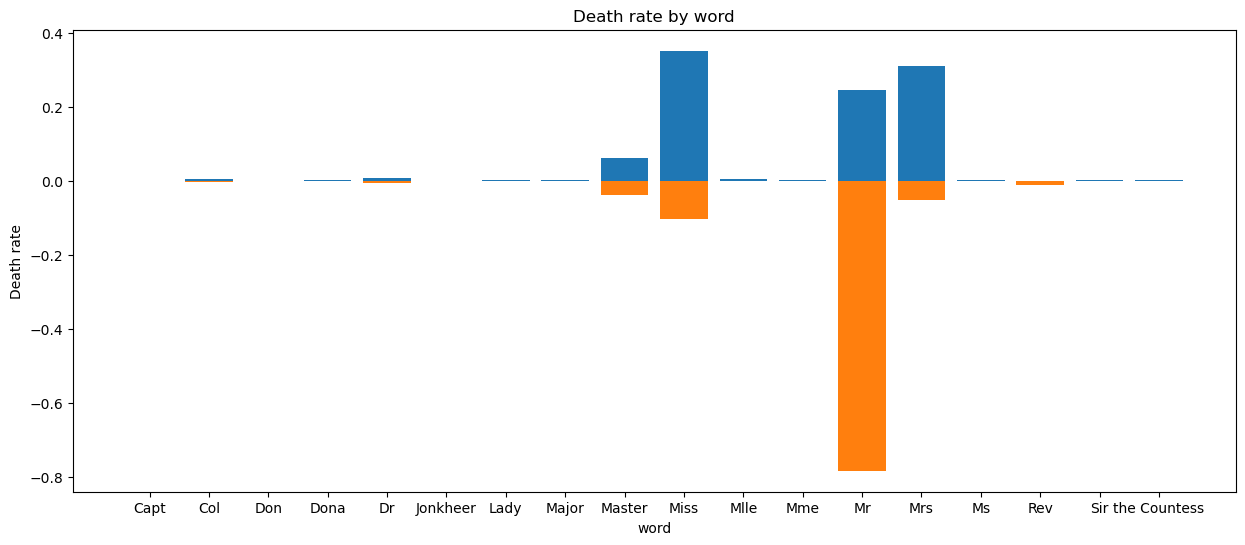

In [8]:
plt.figure(figsize = (15, 6))

word_dead = df.groupby('word')['survived'].count() - word_survived
total_dead = df['survived'].count() - total_survived
word_death_rate = word_dead / total_dead

plt.bar(word_survival_rate.index, word_survival_rate.values)
plt.bar(word_death_rate.index, -word_death_rate.values)

plt.xlabel('word')
plt.ylabel('Death rate')
plt.title('Death rate by word')

plt.show()

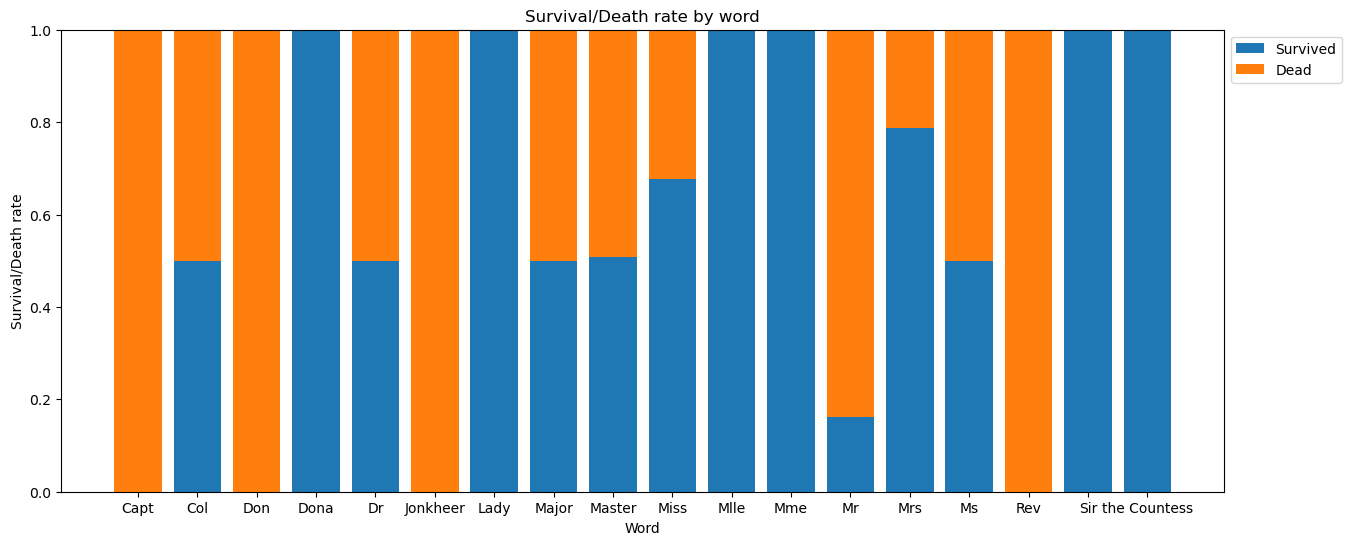

In [9]:
plt.figure(figsize = (15, 6))

word_survived = df.groupby('word')['survived'].sum()
word_dead = df.groupby('word')['survived'].count() - word_survived
word_total = word_survived + word_dead
word_survival_rate = word_survived / word_total
word_death_rate = word_dead / word_total

# 그래프를 그림
plt.bar(word_survival_rate.index, word_survival_rate.values, label='Survived')
plt.bar(word_death_rate.index, word_death_rate.values, bottom=word_survival_rate.values, label='Dead')

plt.xlabel('Word')
plt.ylabel('Survival/Death rate')
plt.title('Survival/Death rate by word')
plt.legend(bbox_to_anchor = [1,1], loc = 'upper left')

plt.show()

In [10]:
df.drop(['name'], axis = 1, inplace = True)

In [11]:
df.head()

,pclass,survived,word,sex,age,sibsp,parch,fare,embarked
0,1,1,Miss,female,29.00,0,0,211.3375,S
1,1,1,Master,male,0.92,1,2,151.55,S
2,1,0,Miss,female,2.00,1,2,151.55,S
3,1,0,Mr,male,30.00,1,2,151.55,S
4,1,0,Mrs,female,25.00,1,2,151.55,S


In [12]:
df['word'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [13]:
df['sex'] = df.sex.replace({'male' : 0, 'female' : 1})
df['word'] = df.word.replace({'Miss' : 0, 'Master' :1, 'Mr' : 2, 'Mrs' : 3, 'Col' : 4, 'Mme' : 5, 'Dr' : 6, 'Major' : 7, 'Capt' : 8,
       'Lady' : 9, 'Sir' : 10, 'Mlle' : 11, 'Dona' : 12, 'Jonkheer' : 13, 'the Countess' : 14, 'Don' : 15,
       'Rev' : 16, 'Ms' : 17})
df

,pclass,survived,word,sex,age,sibsp,parch,fare,embarked
0,1,1,0,1,29.00,0,0,211.3375,S
1,1,1,1,0,0.92,1,2,151.55,S
2,1,0,0,1,2.00,1,2,151.55,S
3,1,0,2,0,30.00,1,2,151.55,S
4,1,0,3,1,25.00,1,2,151.55,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,0,1,14.50,1,0,14.4542,C
1305,3,0,0,1,29.88,1,0,14.4542,C
1306,3,0,2,0,26.50,0,0,7.225,C
1307,3,0,2,0,27.00,0,0,7.225,C


In [14]:
df['embarked'] = df.embarked.replace({'S' : 0, 'Q' : 1, 'C' :2, 'N' : 0})

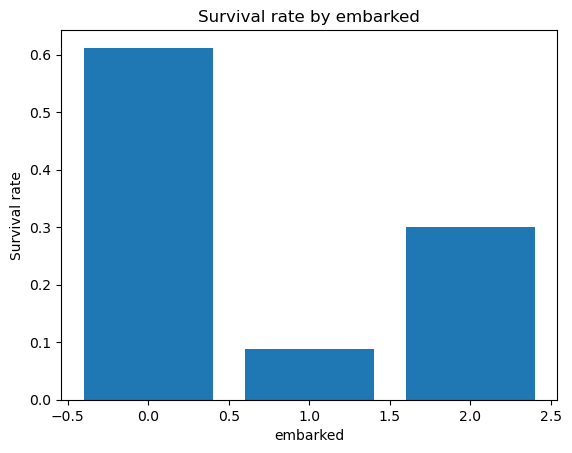

In [15]:
embarked_survived = df.groupby('embarked')['survived'].sum()
total_survived = df['survived'].sum()
embarked_survival_rate = (embarked_survived / total_survived)

plt.bar(embarked_survival_rate.index, embarked_survival_rate.values)

plt.xlabel('embarked')
plt.ylabel('Survival rate')
plt.title('Survival rate by embarked')

plt.show()

In [16]:
df.loc[(df['pclass'] == 1) & (df['fare'] == 'N'), 'fare'] = 87.5
df.loc[(df['pclass'] == 2) & (df['fare'] == 'N'), 'fare'] = 21.7
df.loc[(df['pclass'] == 3) & (df['fare'] == 'N'), 'fare'] = 13.3

# df.fare.astype(int)
# df.loc[df['pclass'] == 1, 'fare'].min() # 87.5, 0, 512
# df.loc[df['pclass'] == 2, 'fare'].min() # 21.7, 0, 73,5
# df.loc[df['pclass'] == 3, 'fare'].min() # 13.3, 0, 69.5

df

,pclass,survived,word,sex,age,sibsp,parch,fare,embarked
0,1,1,0,1,29.00,0,0,211.3375,0
1,1,1,1,0,0.92,1,2,151.55,0
2,1,0,0,1,2.00,1,2,151.55,0
3,1,0,2,0,30.00,1,2,151.55,0
4,1,0,3,1,25.00,1,2,151.55,0
...,...,...,...,...,...,...,...,...,...
1304,3,0,0,1,14.50,1,0,14.4542,2
1305,3,0,0,1,29.88,1,0,14.4542,2
1306,3,0,2,0,26.50,0,0,7.225,2
1307,3,0,2,0,27.00,0,0,7.225,2


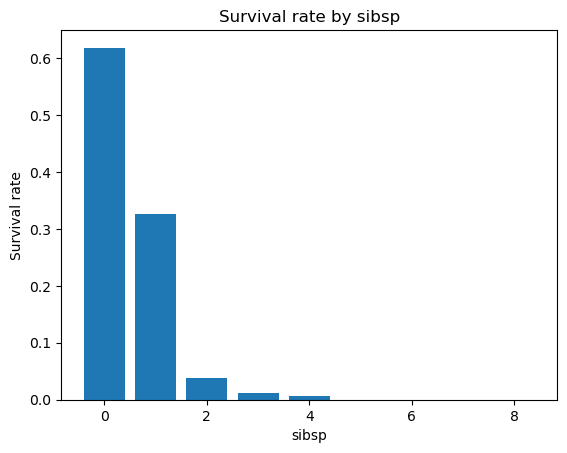

In [17]:
sibsp_survived = df.groupby('sibsp')['survived'].sum()
total_survived = df['survived'].sum()
sibsp_survival_rate = sibsp_survived / total_survived

plt.bar(sibsp_survival_rate.index, sibsp_survival_rate.values)

plt.xlabel('sibsp')
plt.ylabel('Survival rate')
plt.title('Survival rate by sibsp')

plt.show()

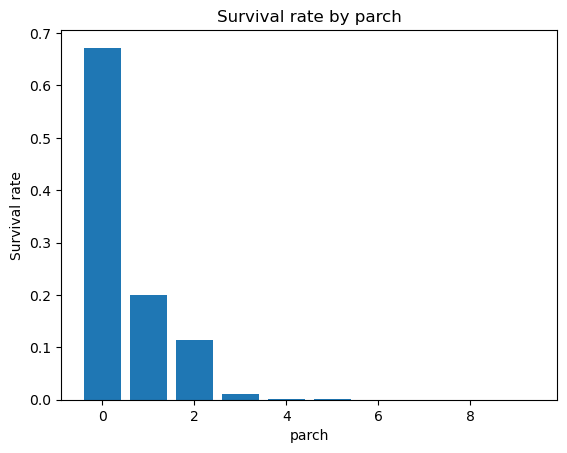

In [18]:
parch_survived = df.groupby('parch')['survived'].sum()
total_survived = df['survived'].sum()
parch_survival_rate = parch_survived / total_survived

plt.bar(parch_survival_rate.index, parch_survival_rate.values)

plt.xlabel('parch')
plt.ylabel('Survival rate')
plt.title('Survival rate by parch')

plt.show()

In [19]:
df['family'] = ((df['sibsp'] != 0) | (df['parch'] != 0)).astype(int)

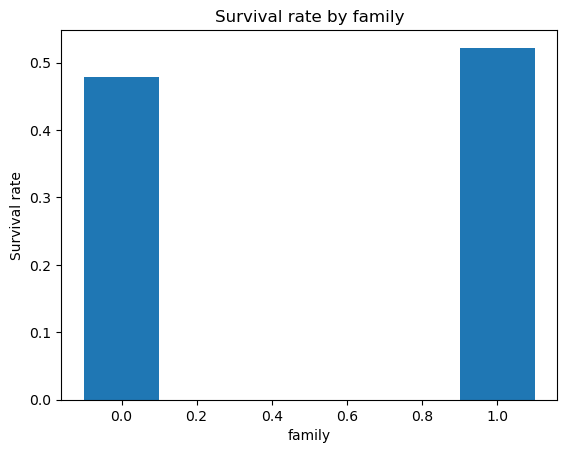

In [20]:
family_survived = df.groupby('family')['survived'].sum()
total_survived = df['survived'].sum()
family_survival_rate = family_survived / total_survived

plt.bar(family_survival_rate.index, family_survival_rate.values, width = 0.2)

plt.xlabel('family')
plt.ylabel('Survival rate')
plt.title('Survival rate by family')

plt.show()

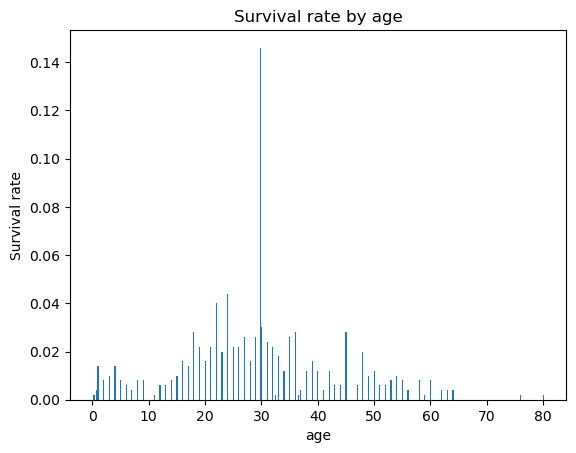

In [21]:
age_survived = df.groupby('age')['survived'].sum()
total_survived = df['survived'].sum()
age_survival_rate = age_survived / total_survived

plt.bar(age_survival_rate.index, age_survival_rate.values, width = 0.2)

plt.xlabel('age')
plt.ylabel('Survival rate')
plt.title('Survival rate by age')

plt.show()

In [22]:
def age_cat(age) :
    
    cat = ''
    
    if age <= 10 : cat = '1'
    elif age <= 29 : cat = '2'
    elif age <= 40 : cat = '3'
    elif age <= 60 : cat = '4'
    else : cat = '5'
    
    return cat

df['age_cat'] = df.age.apply(lambda x: age_cat(x))

df

,pclass,survived,word,sex,age,sibsp,parch,fare,embarked,family,age_cat
0,1,1,0,1,29.00,0,0,211.3375,0,0,2
1,1,1,1,0,0.92,1,2,151.55,0,1,1
2,1,0,0,1,2.00,1,2,151.55,0,1,1
3,1,0,2,0,30.00,1,2,151.55,0,1,3
4,1,0,3,1,25.00,1,2,151.55,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,1,14.50,1,0,14.4542,2,1,2
1305,3,0,0,1,29.88,1,0,14.4542,2,1,3
1306,3,0,2,0,26.50,0,0,7.225,2,0,2
1307,3,0,2,0,27.00,0,0,7.225,2,0,2


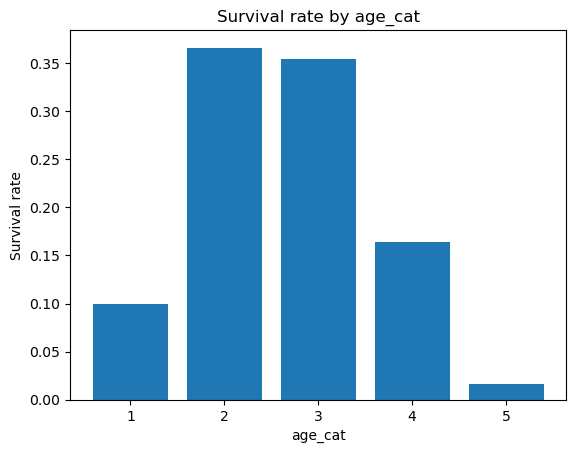

In [23]:
age_cat_survived = df.groupby('age_cat')['survived'].sum()
total_survived = df['survived'].sum()
age_cat_survival_rate = age_cat_survived / total_survived

plt.bar(age_cat_survival_rate.index, age_cat_survival_rate.values)

plt.xlabel('age_cat')
plt.ylabel('Survival rate')
plt.title('Survival rate by age_cat')

plt.show()

In [24]:
df.corr()

,pclass,survived,word,sex,age,sibsp,parch,embarked,family
pclass,1.000000,-0.312469,-0.158179,-0.124617,-0.366378,0.060832,0.018322,-0.185479,-0.147393
survived,-0.312469,1.000000,-0.077812,0.528693,-0.050195,-0.027825,0.082660,0.175313,0.201719
word,-0.158179,-0.077812,1.000000,-0.176658,0.281660,-0.087727,-0.050318,0.010638,-0.000655
sex,-0.124617,0.528693,-0.176658,1.000000,-0.057395,0.109609,0.213125,0.097960,0.284537
age,-0.366378,-0.050195,0.281660,-0.057395,1.000000,-0.190747,-0.130869,0.071177,-0.116669
sibsp,0.060832,-0.027825,-0.087727,0.109609,-0.190747,1.000000,0.373587,-0.065567,0.591077
parch,0.018322,0.082660,-0.050318,0.213125,-0.130869,0.373587,1.000000,-0.044772,0.549022
embarked,-0.185479,0.175313,0.010638,0.097960,0.071177,-0.065567,-0.044772,1.000000,0.061649
family,-0.147393,0.201719,-0.000655,0.284537,-0.116669,0.591077,0.549022,0.061649,1.000000


In [25]:
# df.to_pickle('../판다스/dataset/dataset_base/tdf.pkl')
# titanic_df = pd.read_pickle('../판다스/dataset/dataset_base/tdf.pkl')

df.to_pickle('../dataset/dataset_base/tdf.pkl')
titanic_df = pd.read_pickle('../dataset/dataset_base/tdf.pkl')

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = titanic_df['survived'] # 종속변수
X_t_df = titanic_df.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)


(1047, 10)
(262, 10)


In [29]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.82, lr 정확도:0.81


C:\Users\h\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
